In [1]:
from bs4 import BeautifulSoup
import sys, urllib.request
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from collections import Counter
%matplotlib inline

In [2]:
rank_no=[]
artist=[]
music=[]
twitter=[]

In [3]:
def get_single_item_data(item_url, number_start =0,num_end =100):
        source_code = urllib.request.urlopen(item_url)  # get all source code
        source_text = source_code.read()
        #plain_text = source_text.decode('utf-8')
        #output = open('plain_text','w+')
        #output.write(plain_text)
        #output.close()
        soup = BeautifulSoup(source_text,"html.parser")
        #toplist = soup.find_all('table',{'class':'smv'}).find_all("tr")[0].find_all("td")td[3]
        toplist = soup.find_all('table',{'class':'smv'})
        Top_Emerging = toplist[0] # Emerging
        Top_Trending = toplist[1] # Trending updating fast in 6 seconds
        Top_Overall = toplist[2] # overall Comprehensive result
        #print(toplist[2])
        rank_list = toplist[1].find_all('tr')
        for rank in rank_list[number_start:num_end]:
            rank_no.append(rank.find_all('td')[0].text)
            artist.append(rank.find_all('td')[1].text)
            music_text = rank.find_all('td')[2].text
            music.append(music_text[0:(music_text.find("\n"))-1])
            twitter.append(rank.find_all('td')[1].find('a').get("href"))
        for i in np.arange(len(artist)).tolist()[0:5]:
            print("ranking No:"+str(i+1)+"   artist:"+artist[i]+"  music:"+music[i]+'\n')
            print(twitter[i]+'\n')


In [4]:
#print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  Top Five song and Singers   $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")
get_single_item_data("http://realtime.billboard.com/?chart=trending140", 0, 20)

ranking No:1   artist:Tyrese  music:Shame (feat. Jennifer Hudson)

http://twitter.com/Tyrese

ranking No:2   artist:Adele  music:Hello

http://twitter.com/Adele

ranking No:3   artist:Super Junior  music:Magic

http://twitter.com/donghae861015

ranking No:4   artist:Super Junior  music:Devil

http://twitter.com/donghae861015

ranking No:5   artist:Lil Wayne  music:Used To

http://twitter.com/LilTunechi



In [5]:
Top_Trending_df = pd.DataFrame({'No.':rank_no, 'artist': artist, 'music':music, 'Twitter':twitter})

In [6]:
Top_Trending_df[0:5]

,No.,Twitter,artist,music
0,1,http://twitter.com/Tyrese,Tyrese,Shame (feat. Jennifer Hudson)
1,2,http://twitter.com/Adele,Adele,Hello
2,3,http://twitter.com/donghae861015,Super Junior,Magic
3,4,http://twitter.com/donghae861015,Super Junior,Devil
4,5,http://twitter.com/LilTunechi,Lil Wayne,Used To


In [7]:
Top_Trending_df.describe()

,No.,Twitter,artist,music
count,20,20,20,20
unique,20,17,17,20
top,2,http://twitter.com/Adele,Adele,Send My Love (To Your New Lover)
freq,1,3,3,1


------------top 20 songs------17 singers in total---------


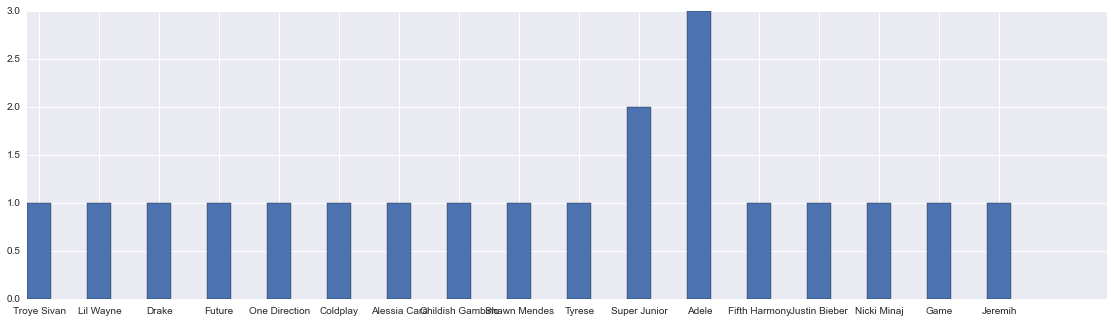

In [8]:
count = dict(Counter(artist))
#print(count)

xVals = list(count.keys())
yVals = list(count.values())
print("------------top 20 songs------"+str(len(np.unique(xVals)))+" singers in total---------")
#print(np.unique(xVals))
x = tuple(np.arange(len(xVals)))
width = 0.4
ax = plt.subplot(111)
ax.set_position([5,2,2.5,1])
ax.bar(x, yVals, width)
ax.set_xticks([i+width/2 for i in x])
ax.set_xticklabels(xVals)
plt.rcParams['font.size'] = 80


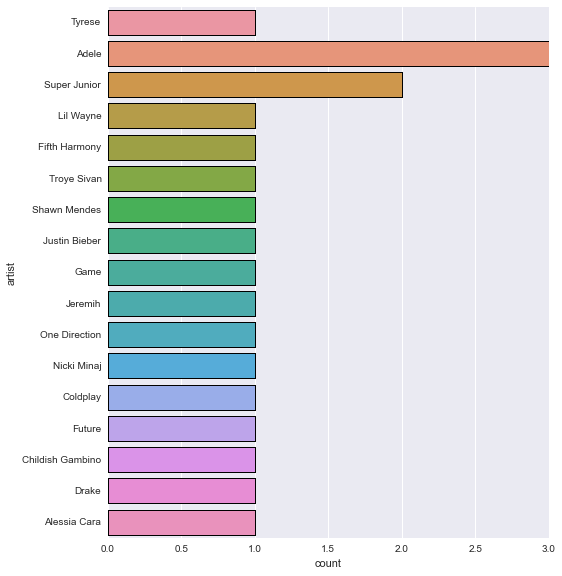

In [10]:
sns.factorplot(y='artist', data=Top_Trending_df, kind='count',size=10,linewidth=1)

In [11]:
Top_Trending_df.to_csv("Top_Trending_top20.csv", index=False)